In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.signal import convolve2d


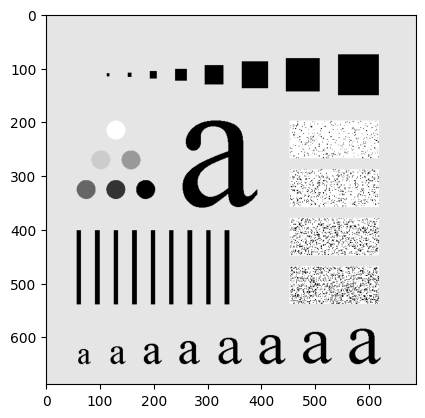

In [19]:
f = np.array(Image.open('./assets/Fig0448(a)(characters_test_pattern).tif').convert('L'))

# Plot the image
plt.imshow(f, cmap='gray')
plt.show()


In [20]:
# Declare the sizes of kernel to be used when filtering
sizes = [3, 5, 9, 15, 25, 35, 45, 55]

# Apply each kernel and store the filtered image
filter = np.zeros((len(sizes), f.shape[0], f.shape[1]))

for i, size in enumerate(sizes):

    # Create the kernel with the appropriate size (n*n) and normalize it (divide it for it size)
    kernel = np.ones((size,size), np.float32) / size**2

    # Apply the filter using a 2D convolution
    filter[i,:,:] = convolve2d(f, kernel, mode='same')


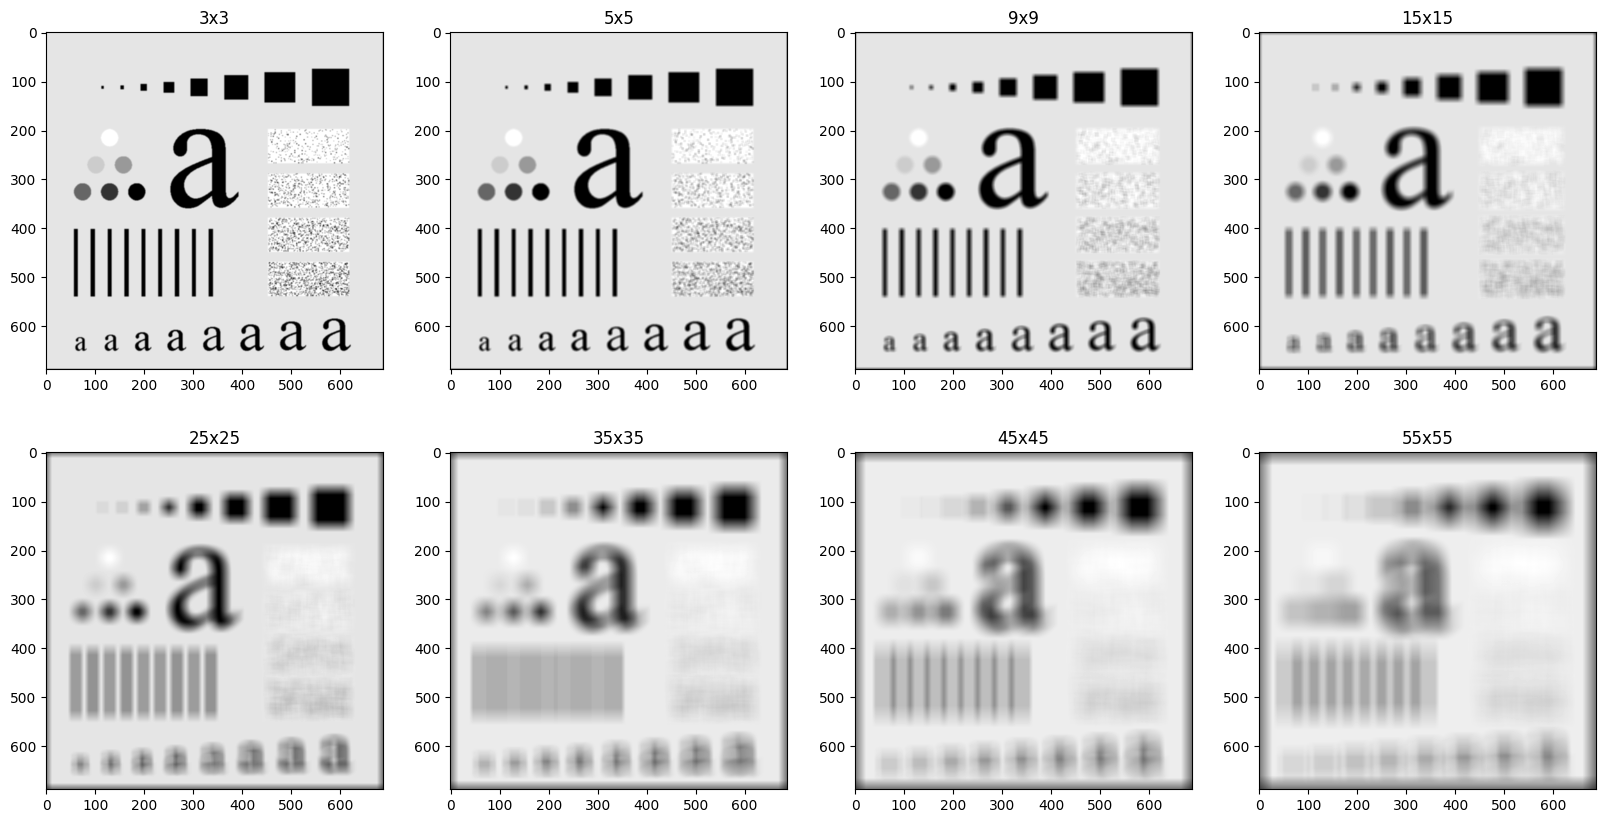

In [21]:
# Plotting
fig, ax = plt.subplots(2, len(filter) // 2, figsize=(20, 10))
for i, filtered_image in enumerate(filter):    
    ax.flatten()[i].set_title(f'{sizes[i]}x{sizes[i]}')
    ax.flatten()[i].imshow(filtered_image, cmap='gray')

# Show the plot
plt.show()

Esto demuestra que aplicar filtros pasabajos con diferentes tamaños a una imagen provoca un aumento en el efecto de difuminado o desenfoque a medida que incrementa justamente el tamanio. Esto se da porque los filtros eliminan las altas frecuencias espaciales, lo que suaviza los detalles finos y reduce la definición de la imagen. Este efecto es útil para reducir el ruido, ya que las áreas con patrones aleatorios se vuelven homogéneas, pero también puede causar una pérdida significativa de información espacial, como la distinción entre líneas y bordes. 
En conclusion mientras las imagenes pequeñas ofrecen un suavizado moderado, los más grandes pueden resultar en una imagen con menos detalles y más difusa, es esencial elegir el tamaño del kernel según el objetivo específico del procesamiento de la imagen.